`wu_data_gen_rand_tau_rand_phase.ipynb`

In [ ]:
import pandas as pd

In [2]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FuncFormatter
from plot_styles import set_plotstyles
set_plotstyles()
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# frequencies
# from 0.100 GHZ to 0.200 GHz, 1024 channels, 
# (9.77517107e-05 GHz per channel)
freqs = np.linspace(0.1, 0.2, 1024)

# delay time tau 
# from -100 ns to 100 ns
abs_max_tau = 100 
num_taus = 10000

In [4]:
get_slope = lambda x: np.mean((np.diff(np.unwrap(x))  / (2 * np.pi)) / np.diff(freqs))

This data will have a low amount of noise applied to every row. Not enough to break the unwrap function.

In [58]:
rand_wangle_data = np.empty((num_taus, len(freqs)))
slope_rwd = np.empty(num_taus)
for i in range(num_taus):
    
    # random tau in a range with fuzzy edges...
    tau = np.random.uniform(low = np.random.uniform(low = -110, high = -90),
                            high = np.random.uniform(low = 90, high = 110)) 
    phi = np.random.uniform(high = 2 * np.pi)
    
    rand_wangle_data[i] = np.angle(np.exp(2 * np.pi * 1j * (tau*freqs + phi)))
    slope_rwd[i] = get_slope(rand_wangle_data[i])
    noise = np.random.normal(scale = 0.25, size = len(freqs))
    rand_wangle_data[i] += noise

In [82]:
df = pd.DataFrame(rand_wangle_data)
df.insert(0, 'slope', slope_rwd)

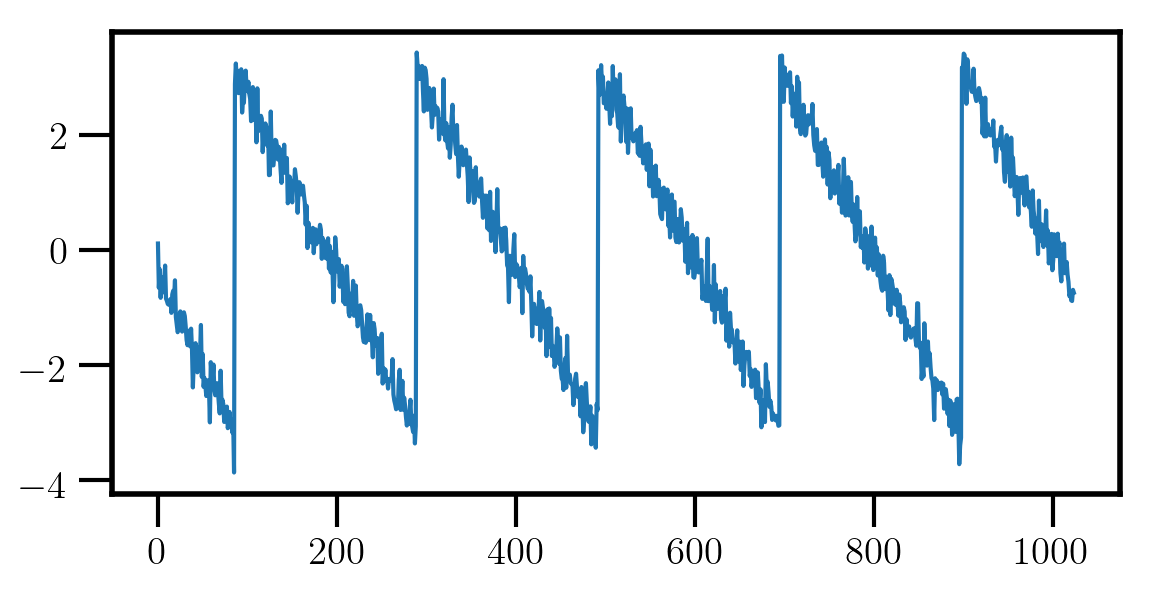

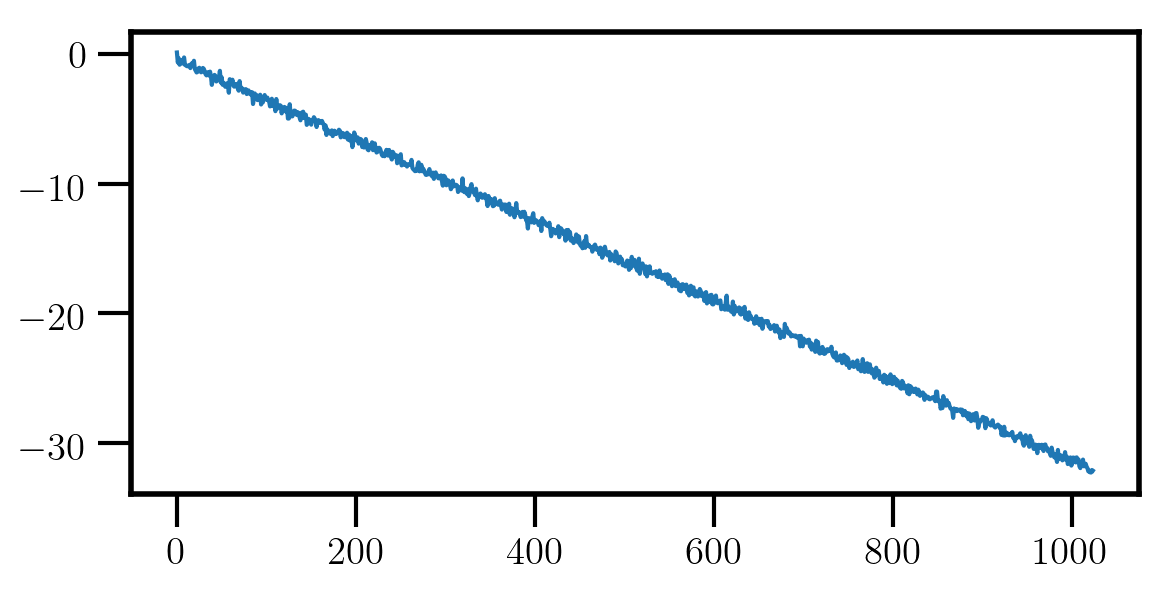

In [87]:
random_row = df.sample()
random_row_vals = random_row.drop(columns = 'slope').values
plt.plot(random_row_vals[0])
plt.show()

plt.plot(np.unwrap(random_row_vals[0]))
plt.show()

In [84]:
df.to_csv('data/wu_fuzzy_rand_tau_rand_phase.csv', index = False)

This data will have a low amount of noise applied to every row. Not enough to break the unwrap function.

It will also have a larger amount of noise applied to 50% of the data. Enough to break the unwrap function.

In [92]:
rand_wangle_data = np.empty((num_taus, len(freqs)))
slope_rwd = np.empty(num_taus)
for i in range(num_taus):
    
    # random tau in a range with fuzzy edges...
    tau = np.random.uniform(low = np.random.uniform(low = -110, high = -90),
                            high = np.random.uniform(low = 90, high = 110)) 
    phi = np.random.uniform(high = 2 * np.pi)
    
    rand_wangle_data[i] = np.angle(np.exp(2 * np.pi * 1j * (tau*freqs + phi)))
    slope_rwd[i] = get_slope(rand_wangle_data[i])
    if np.random.uniform() > 0.5:
        noise = np.random.normal(scale = 0.25, size = len(freqs))
    else:
        noise = noise = np.random.normal(scale = 1, size = len(freqs))
    rand_wangle_data[i] += noise

In [93]:
df = pd.DataFrame(rand_wangle_data)
df.insert(0, 'slope', slope_rwd)

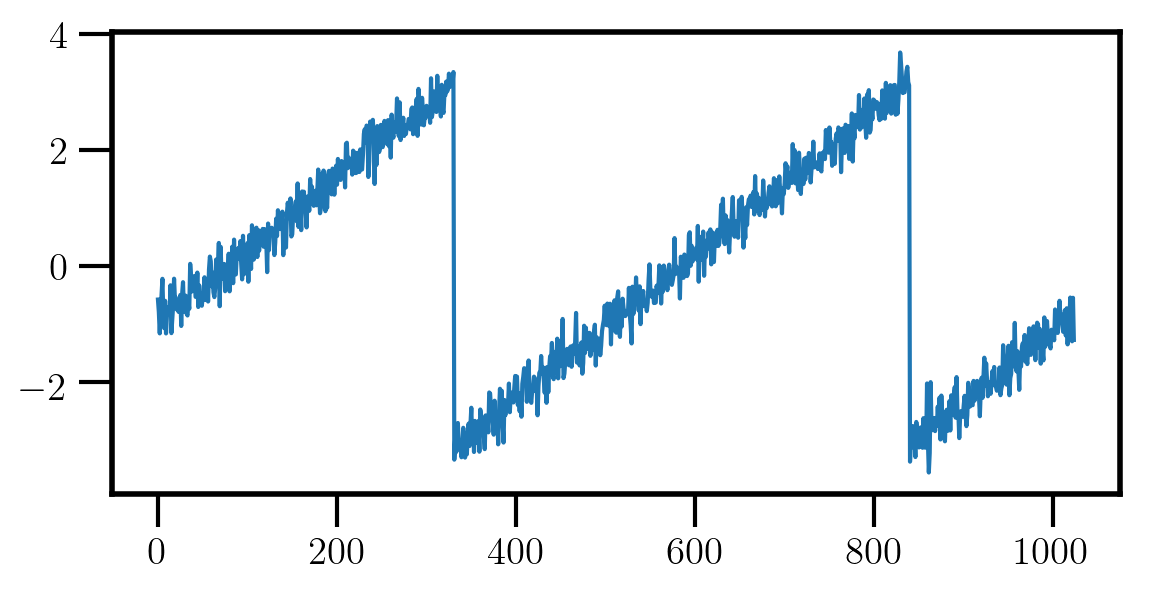

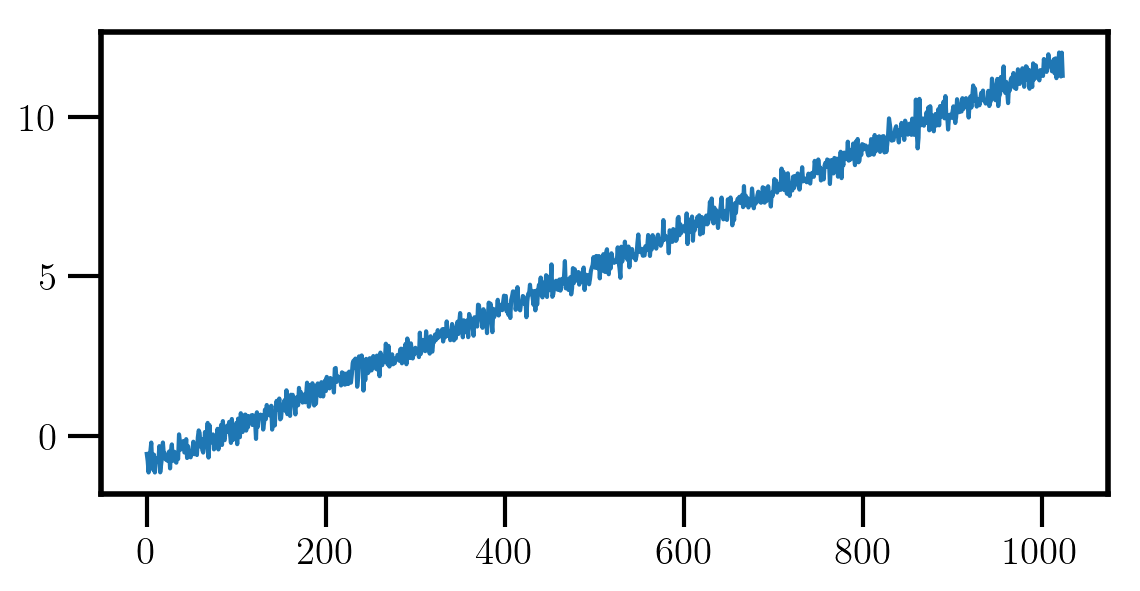

In [94]:
random_row = df.sample()
random_row_vals = random_row.drop(columns = 'slope').values
plt.plot(random_row_vals[0])
plt.show()
plt.plot(np.unwrap(random_row_vals[0]))
plt.show()

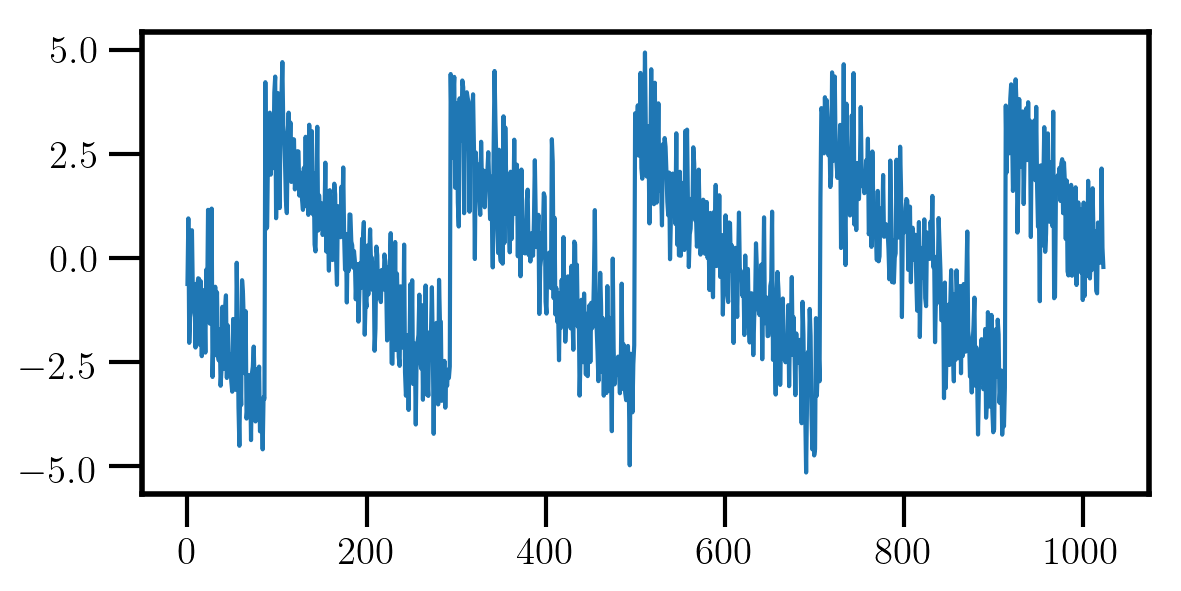

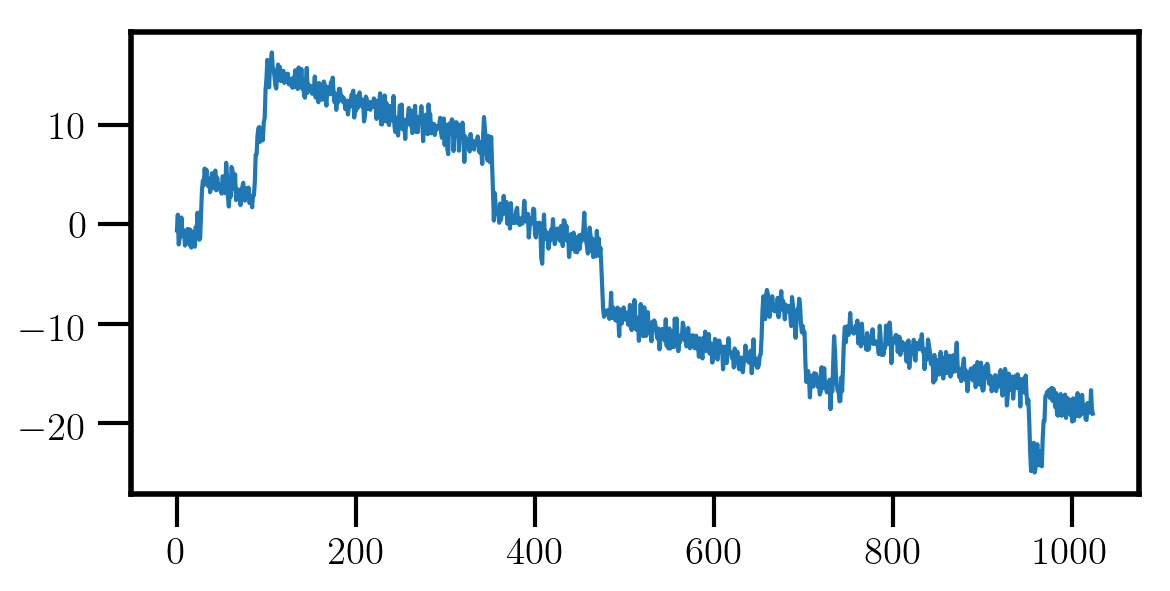

In [95]:
random_row = df.sample()
random_row_vals = random_row.drop(columns = 'slope').values
plt.plot(random_row_vals[0])
plt.show()
plt.plot(np.unwrap(random_row_vals[0]))
plt.show()

In [96]:
df.to_csv('data/wu_fuzzy_rand_tau_rand_phase_more_noise.csv', index = False)

> I want to see if its possible to train a NN on the first data set and then subequently on the second.